In [1]:
from BlackJack_classes import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
card_values = ['2','3','4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
card_suits = ['Hearts', 'Diamonds', 'Spades', 'Clubs'] # not really relevant - to remove at a later point

a_deck_of_cards = [Card(value, suit) for value in card_values for suit in card_suits]

aDeck = Deck(a_deck_of_cards)

Player1 = softRL_Player(name='LR_0.001 - soft (0.01)', lr = 0.001, epsilon = 0.01)
Player2 = softRL_Player(name='LR_0.001 - soft (0.05)', lr = 0.001, epsilon = 0.05)
Player3 = softRL_Player(name='LR_0.001 - soft (0.1)', lr = 0.001, epsilon = 0.1)
Player4 = RL_Player(name = 'LR_0.001',lr = 0.001)
# Player5 = softRL_Player(name='LR_1 - soft (0.005)', lr = 1, epsilon = 0.005)
# Player1 = RL_Player(name='LR_0.001', lr = 0.001)
# Player4 = Test_Player(name = 'Random', strat = 'RANDOM') # 50 / 50 player
# # Player5 = Test_Player(name = 'Always_hit', strat = 'HIT') # always hits
# # Player6 = Test_Player(name = 'Always_stay', strat = 'STAY') # always stays
# Player7 = Dealer() # dealer strategy

Players = [
    Player1,
     Player2,
      Player3, 
      Player4,
    #   Player5
      ]


aDealer = Dealer()



In [3]:
for i in range(1,500):
    for aPlayer in Players:
        aGame = Game(i,aDeck, [aPlayer], aDealer, VERBOSE = False)
        aGame.play()


In [18]:
def extractAllPlayerResults(list_of_players):
    all_results = pd.DataFrame()
    for a_player in list_of_players:
        temp = pd.DataFrame(pd.Series(a_player.wins))
        temp.rename({0:'result'}, axis = 1, inplace = True)
        temp['win'] = temp.result > 0
        temp['n'] = temp.index # gets row number
        temp['win_rate'] = round(100 * temp['win'].cumsum() / temp['n'],2)
        temp['name'] = a_player.name
        all_results = pd.concat([all_results, temp])
    all_results.reset_index(inplace = True)
    return all_results

other_results = extractAllPlayerResults(Players)

Text(41.15231770833334, 0.5, 'Win Rate')

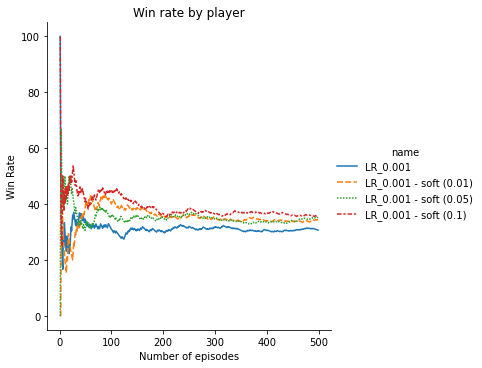

In [19]:

wide_results = pd.pivot_table(other_results, index = 'n', columns = 'name', values = 'win_rate')

sns.relplot(data = wide_results,  kind= 'line');
plt.title('Win rate by player')
plt.xlabel('Number of episodes')
plt.ylabel('Win Rate')


In [17]:
other_results


,index


In [6]:
all_results[['win_rate', 'name']].groupby('name').mean().sort_values(by = 'win_rate', ascending = False)

,win_rate
name,
LR_0.001 - soft (0.1),39.009098
LR_0.001 - soft (0.01),35.250541
LR_0.001 - soft (0.05),35.196733
LR_0.001,31.119158


In [403]:
last_results = all_results[all_results.n > 49000].copy()
last_results.groupby('name').sum() / 1000 # gives approx win-rate over the last 10000

# first_results = all_results[all_results.n < 1000].copy()
# first_results.groupby('name').sum() / 1000

,index,result,win,n,win_rate
name,,,,,
LR_0.001,1.249880e+10,-365.355,2292.822,1.249880e+10,223977.67343


C:\Users\61417\AppData\Local\Temp/ipykernel_10736/167519177.py:54: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf)


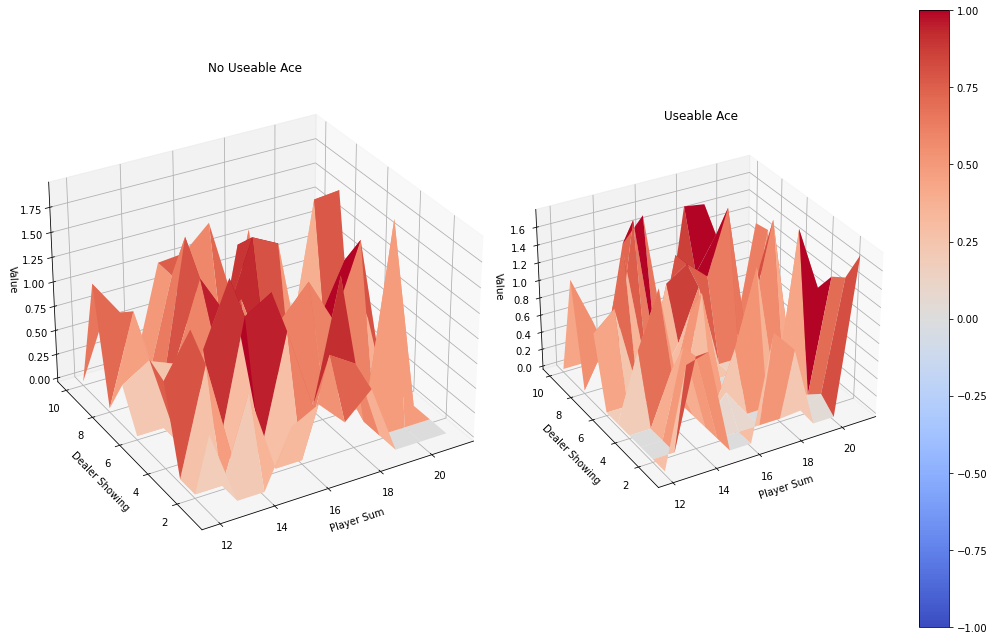

In [7]:

def plotValueFunction(aPlayer):

    # calculate value func
    value_func = np.sum(aPlayer.Q * aPlayer.pi, axis = 3) 

    # get X, Y for restricted axis - 12 to 21, dealer showing 0 - 10 
    X, Y = np.meshgrid(np.array([i for i in range(12, 22)]), [j for j in range(0, 10)])

    Z_noace = np.apply_along_axis(lambda _: value_func[(_[0], _[1], 0)], 2, np.dstack([X, Y]))
    Z_ace = np.apply_along_axis(lambda _: value_func[(_[0], _[1], 1)], 2, np.dstack([X, Y]))

    # Creating figure
    # fig, _ = plt.subplots(1,2,2, figsize=(14,9))
    fig = plt.figure(figsize =(14, 9))
    ax1 = fig.add_subplot(121,projection='3d')
    ax2 = fig.add_subplot(122,projection='3d')
    #ax = plt.axes(projection ='3d')
    
    # Creating plot
    # no useable ace

    surf = ax1.plot_surface(
        X, 
        Y + 1,
        Z_noace,
        rstride=1,
        cstride=1,
        cmap='coolwarm',
        vmin=-1.0,
        vmax=1.0) 

    ax1.set_xlabel('Player Sum')
    ax1.set_ylabel('Dealer Showing')
    ax1.set_zlabel('Value')
    ax1.set_title('No Useable Ace')
    ax1.view_init(ax1.elev, -120)

    surf2 = ax2.plot_surface(
        X, 
        Y + 1,
        Z_ace,
        rstride=1,
        cstride=1,
        cmap='coolwarm',
        vmin=-1.0,
        vmax=1.0) 

    ax2.set_xlabel('Player Sum')
    ax2.set_ylabel('Dealer Showing')
    ax2.set_zlabel('Value')
    ax2.set_title('Useable Ace')
    ax2.view_init(ax2.elev, -120)

    fig.colorbar(surf)
    fig.tight_layout()

    # show plot
    plt.show()




plotValueFunction(Player4)

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,20))

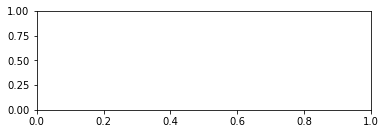

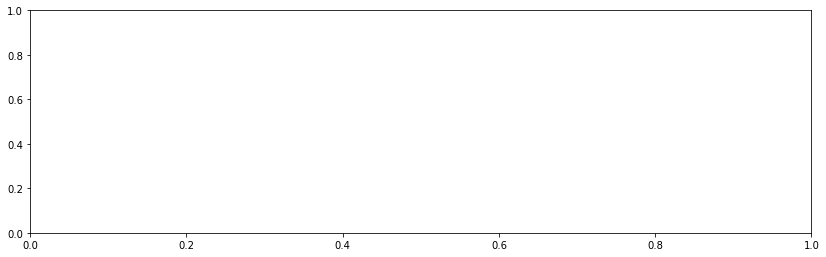

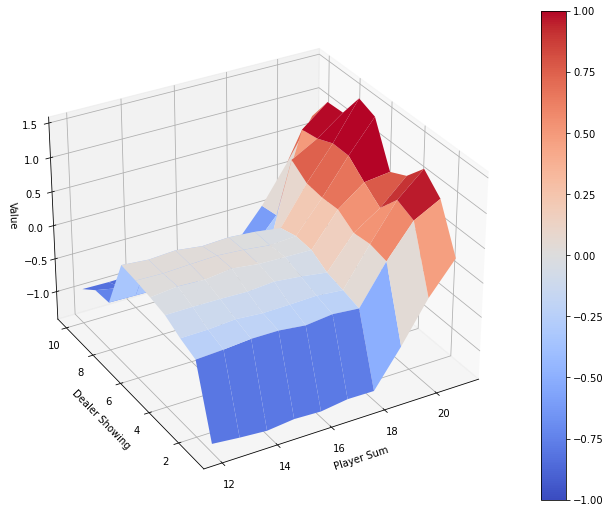

In [445]:

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plotValueFunction(Player4)
# plt.plot(x1, y1, 'ko-')
# plt.title('A tale of 2 subplots')
# plt.ylabel('Damped oscillation')


plt.subplot(2, 1, 2)
plotValueFunction(Player4)
# plt.plot(x2, y2, 'r.-')
# plt.xlabel('time (s)')
# plt.ylabel('Undamped')

plt.show()

In [418]:
Z_ace = np.apply_along_axis(lambda _: val[(_[0], _[1], 1)], 2, np.dstack([X, Y]))
Z_ace.shape

(10, 10)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

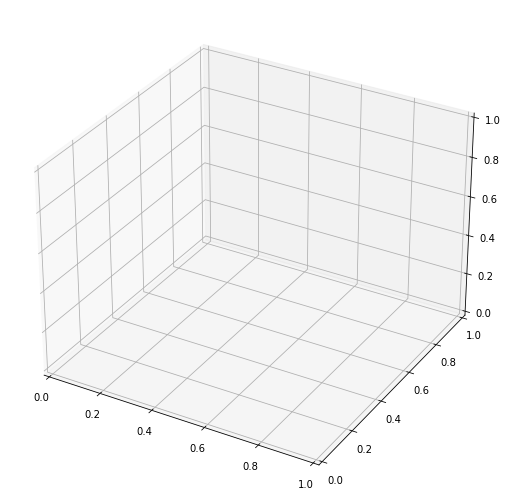

In [216]:


x = np.array([i for i in range(1, 11)])
y = np.array([i for i in range(12, 21)])
z = np.array([[i + j] for i in x for j in y])
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.plot_surface(x, y, z)
 
# show plot
plt.show()

In [72]:
# first index is player score - ranges from 5 to 21 (17): to update value, correct index is gotten using player.score - 5
# second index is face up value of dealer - any card value (13): correct index is gotten card_value.index(card value)
# third index is actions - hit or stay (2) - arbitrarily assign hit to index 0, stay to index 1
Q = np.zeros((17, 13, 2))
pi = np.random.uniform(0,1, (17,13,2))

In [9]:


test = namedtuple(typename = 'test',
                  field_names = ('hello', "goodbye"))
test(1,2)


test(hello=1, goodbye=2)

In [67]:
from sklearn.preprocessing import normalize
new_pi = np.vstack([normalize(pi[i,], axis = 1, norm = 'l1') for i in range(0,pi.shape[0])])
print(new_pi[1,1,], pi[1,1,])

0.6308996471179777 [0.28878127 0.71379169]


In [69]:
pi[1,]

array([0.32660253, 0.07878575])

In [136]:
all_aces = [Card('A', 'Spades'), Card('10', 'Hearts'), Card('3', 'Spades'), Card('3', 'Hearts')]
aplayer = Player()
aplayer.getHand(all_aces)
aplayer.calcScore()
print(aplayer.score, aplayer.bust)

17 False


In [88]:
print(aplayer.hand)

None


In [39]:
for i in range(0, 26):
    print(i)
    k = aDeck.deal(2)
    print(aDeck[0:3], k)

0
[5 of Spades, 5 of Diamonds, 8 of Hearts] [5 of Hearts, 5 of Clubs]
1
[8 of Hearts, 8 of Clubs, 8 of Spades] [5 of Spades, 5 of Diamonds]
2
[8 of Spades, 8 of Diamonds, 3 of Hearts] [8 of Hearts, 8 of Clubs]
3
[3 of Hearts, 3 of Clubs, 3 of Spades] [8 of Spades, 8 of Diamonds]
4
[3 of Spades, 3 of Diamonds, Q of Hearts] [3 of Hearts, 3 of Clubs]
5
[Q of Hearts, Q of Clubs, Q of Spades] [3 of Spades, 3 of Diamonds]
6
[Q of Spades, Q of Diamonds, 6 of Hearts] [Q of Hearts, Q of Clubs]
7
[6 of Hearts, 6 of Clubs, 6 of Spades] [Q of Spades, Q of Diamonds]
8
[6 of Spades, 6 of Diamonds, 7 of Hearts] [6 of Hearts, 6 of Clubs]
9
[7 of Hearts, 7 of Clubs, 7 of Spades] [6 of Spades, 6 of Diamonds]
10
[7 of Spades, 7 of Diamonds, 9 of Hearts] [7 of Hearts, 7 of Clubs]
11
[9 of Hearts, 9 of Clubs, 9 of Spades] [7 of Spades, 7 of Diamonds]
12
[9 of Spades, 9 of Diamonds, A of Hearts] [9 of Hearts, 9 of Clubs]
13
[A of Hearts, A of Clubs, A of Spades] [9 of Spades, 9 of Diamonds]
14
[A of Spades,

In [37]:
aDeck.reclaimCards()

In [38]:
aDeck[0:3]

[5 of Hearts, 5 of Clubs, 5 of Spades]